In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

passwords = pd.read_csv('passwords.csv')
passwords.head(10)

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0
5,6.0,12345,simple-alphanumeric,1.85,minutes,1.110000e-06,6.0,4.0,8.0
6,7.0,dragon,animal,3.72,days,3.210000e-03,7.0,8.0,11.0
7,8.0,baseball,sport,6.91,years,2.170000e+00,8.0,4.0,8.0
8,9.0,football,sport,6.91,years,2.170000e+00,9.0,7.0,11.0
9,10.0,letmein,password-related,3.19,months,8.350000e-02,10.0,8.0,11.0


In [49]:
passwords.shape

(507, 9)

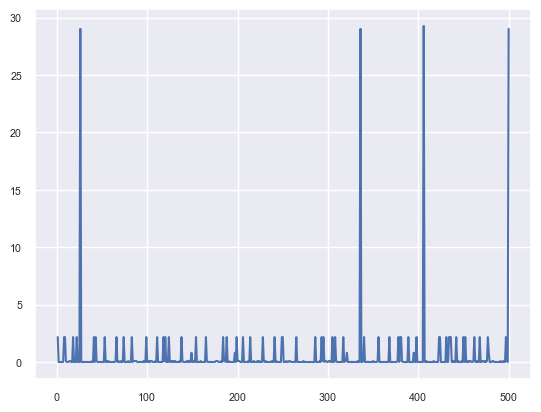

In [50]:
plt.plot(passwords['rank'], passwords['offline_crack_sec'])

In [51]:
passwords.columns

Index(['rank', 'password', 'category', 'value', 'time_unit',
       'offline_crack_sec', 'rank_alt', 'strength', 'font_size'],
      dtype='object')

In [52]:
passwords.rename(columns = {'value': 'time_online_crack'}, inplace = True)
passwords.rename(columns = {'strength': 'reliability'}, inplace = True)
passwords.sample(5)


,rank,password,category,time_online_crack,time_unit,offline_crack_sec,rank_alt,reliability,font_size
360,361.0,blazer,sport,3.72,days,0.00321,362.0,8.0,11.0
291,292.0,88888888,simple-alphanumeric,1.29,days,0.00111,293.0,0.0,0.0
141,142.0,booboo,fluffy,3.72,days,0.00321,142.0,0.0,0.0
497,498.0,college,nerdy-pop,3.19,months,0.08350,500.0,7.0,11.0
454,455.0,nothing,cool-macho,3.19,months,0.08350,457.0,8.0,11.0


In [53]:
passwords.drop(['rank_alt', 'font_size'], axis= 1 , inplace= True )
passwords.sample(5)

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability
301,302.0,peaches,name,3.19,months,8.350000e-02,8.0
480,481.0,mexico,name,3.72,days,3.210000e-03,8.0
429,430.0,1313,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0
392,393.0,mark,name,7.92,minutes,4.750000e-06,6.0
363,364.0,birdie,animal,3.72,days,3.210000e-03,7.0


In [54]:
passwords.duplicated().any()

True

In [55]:
passwords[passwords.duplicated()]

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
passwords.drop_duplicates(inplace=True)

In [57]:
passwords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   time_online_crack  500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   reliability        500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 31.3+ KB


In [58]:
passwords.isna().sum()

rank                 1
password             1
category             1
time_online_crack    1
time_unit            1
offline_crack_sec    1
reliability          1
dtype: int64

In [59]:
(passwords.isna().sum() * 100) / passwords.shape[0]

rank                 0.199601
password             0.199601
category             0.199601
time_online_crack    0.199601
time_unit            0.199601
offline_crack_sec    0.199601
reliability          0.199601
dtype: float64

In [60]:
passwords = passwords.dropna(subset=['rank'], how = 'any')
passwords = passwords.dropna(subset=['password'], how = 'any')
passwords = passwords.dropna(subset=['category'], how = 'any')
passwords = passwords.dropna(subset=['time_online_crack'], how = 'any')
passwords = passwords.dropna(subset=['time_unit'], how = 'any')
passwords = passwords.dropna(subset=['offline_crack_sec'], how = 'any')
passwords = passwords.dropna(subset=['reliability'], how = 'any')
passwords.isna().sum()

rank                 0
password             0
category             0
time_online_crack    0
time_unit            0
offline_crack_sec    0
reliability          0
dtype: int64

In [61]:
passwords.reset_index(drop=True, inplace=True)
passwords.tail(5)

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability
495,496.0,reddog,cool-macho,3.72,days,0.00321,6.0
496,497.0,alexande,name,6.91,years,2.17000,9.0
497,498.0,college,nerdy-pop,3.19,months,0.08350,7.0
498,499.0,jester,name,3.72,days,0.00321,7.0
499,500.0,passw0rd,password-related,92.27,years,29.02000,28.0


In [62]:
passwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   time_online_crack  500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   reliability        500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [63]:
#passwords.rank = passwords.rank.astype('int16')
passwords.category = passwords.category.astype('category')
passwords.reliability = passwords.reliability.astype('int16')
passwords.info()
passwords.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rank               500 non-null    float64 
 1   password           500 non-null    object  
 2   category           500 non-null    category
 3   time_online_crack  500 non-null    float64 
 4   time_unit          500 non-null    object  
 5   offline_crack_sec  500 non-null    float64 
 6   reliability        500 non-null    int16   
dtypes: category(1), float64(3), int16(1), object(2)
memory usage: 21.5+ KB


,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability
0,1.0,password,password-related,6.91,years,2.170000e+00,8
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,4
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,4
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,8


count    5.000000e+02
mean     5.000096e-01
std      2.658132e+00
min      1.110000e-07
25%      3.210000e-03
50%      3.210000e-03
75%      8.350000e-02
max      2.927000e+01
Name: offline_crack_sec, dtype: float64

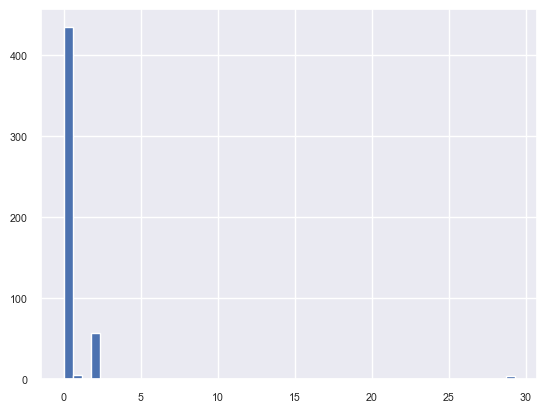

In [64]:
passwords['offline_crack_sec'].hist(bins=50)
passwords['offline_crack_sec'].describe()

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability
405,406.0,jordan23,sport,92.27,years,29.27,34
499,500.0,passw0rd,password-related,92.27,years,29.02,28
25,26.0,trustno1,simple-alphanumeric,92.27,years,29.02,25
335,336.0,rush2112,nerdy-pop,92.27,years,29.02,48
205,206.0,victoria,name,6.91,years,2.17,9
292,293.0,nicholas,name,6.91,years,2.17,10
285,286.0,xxxxxxxx,simple-alphanumeric,6.91,years,2.17,0
264,265.0,mountain,cool-macho,6.91,years,2.17,9
249,250.0,redskins,sport,6.91,years,2.17,9
248,249.0,danielle,name,6.91,years,2.17,8


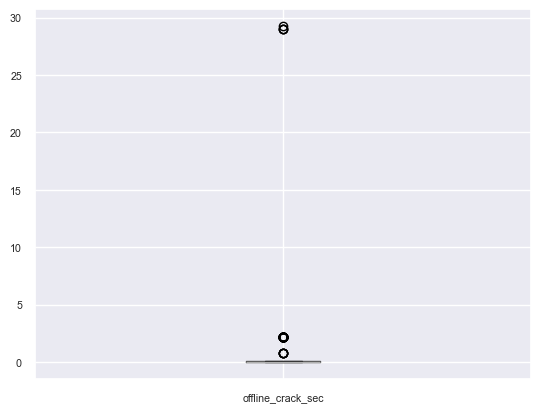

In [65]:
passwords.boxplot(column=['offline_crack_sec'])
passwords.sort_values(by='offline_crack_sec', ascending=False).head(20)

count       500.000000
mean      13917.565247
std       73892.839545
min           0.003086
25%          89.280000
50%          89.280000
75%        2296.800000
max      808285.200000
Name: time_online_crack, dtype: float64

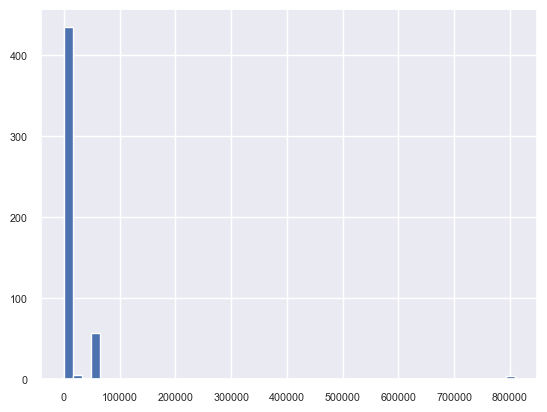

In [66]:
#приведем время онлайн подбора пароля к одной едениче измерения (часам)
units = {
    "seconds": 1 / 3600,
    "minutes": 1 / 60,
    "days": 24,
    "weeks": 168,
    "months": 720,
    "years": 8760,
}

for key, val in units.items():
    passwords.loc[passwords['time_unit'] == key, 'time_online_crack'] *= val 

passwords['time_unit'] = 'hours'
passwords['time_online_crack'].hist(bins=50)
passwords['time_online_crack'].describe()

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability
499,500.0,passw0rd,password-related,808285.2,hours,29.02,28
25,26.0,trustno1,simple-alphanumeric,808285.2,hours,29.02,25
335,336.0,rush2112,nerdy-pop,808285.2,hours,29.02,48
405,406.0,jordan23,sport,808285.2,hours,29.27,34
205,206.0,victoria,name,60531.6,hours,2.17,9
292,293.0,nicholas,name,60531.6,hours,2.17,10
285,286.0,xxxxxxxx,simple-alphanumeric,60531.6,hours,2.17,0
264,265.0,mountain,cool-macho,60531.6,hours,2.17,9
249,250.0,redskins,sport,60531.6,hours,2.17,9
248,249.0,danielle,name,60531.6,hours,2.17,8


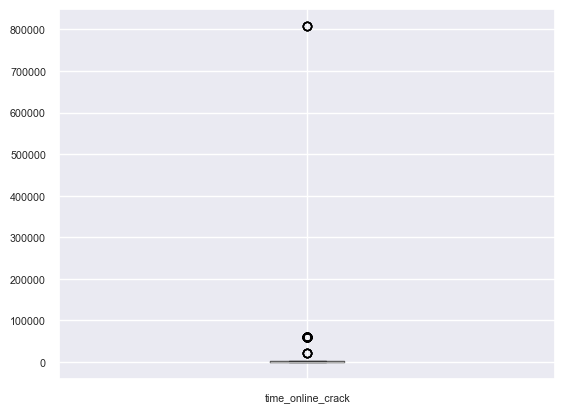

In [67]:
passwords.boxplot(column=['time_online_crack'])
passwords.sort_values(by='time_online_crack', ascending=False).head(20)

count    500.000000
mean       7.432000
std        5.415536
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       48.000000
Name: reliability, dtype: float64

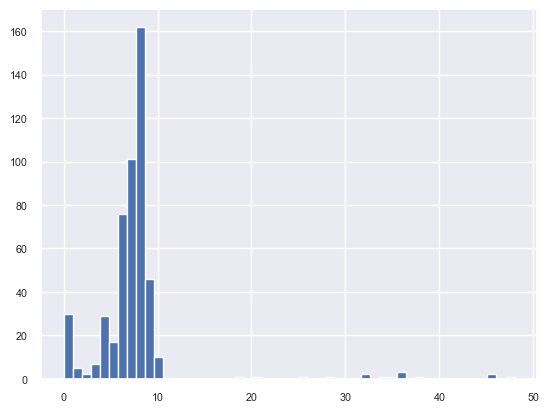

In [68]:
passwords['reliability'].hist(bins=50)
passwords['reliability'].describe()

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability
335,336.0,rush2112,nerdy-pop,808285.20,hours,29.020000,48
148,149.0,ncc1701,nerdy-pop,22425.60,hours,0.806000,46
196,197.0,thx1138,nerdy-pop,22425.60,hours,0.806000,46
320,321.0,bond007,nerdy-pop,22425.60,hours,0.806000,38
358,359.0,ou812,nerdy-pop,17.28,hours,0.000622,36
394,395.0,heka6w2,simple-alphanumeric,22425.60,hours,0.806000,36
477,478.0,test123,simple-alphanumeric,22425.60,hours,0.806000,36
343,344.0,red123,simple-alphanumeric,621.60,hours,0.022400,35
405,406.0,jordan23,sport,808285.20,hours,29.270000,34
462,463.0,123abc,simple-alphanumeric,621.60,hours,0.022400,32


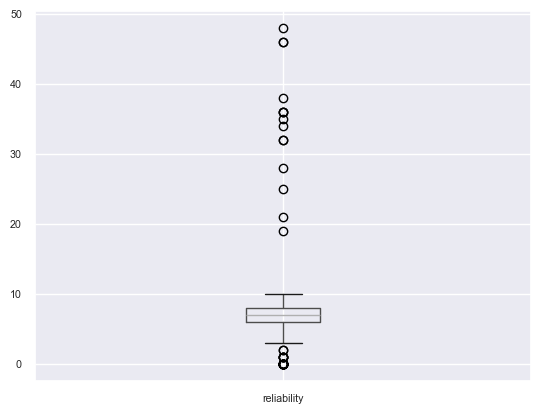

In [69]:
passwords.boxplot(column=['reliability'])
passwords.sort_values(by='reliability', ascending=False).head(20)

In [70]:
passwords = passwords.loc[passwords['reliability'] < 11]
passwords.sort_values(by='reliability', ascending=False).head(15)

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability
21,22.0,superman,name,60531.6,hours,2.1700,10
380,381.0,lifehack,cool-macho,60531.6,hours,2.1700,10
292,293.0,nicholas,name,60531.6,hours,2.1700,10
304,305.0,qwertyui,simple-alphanumeric,60531.6,hours,2.1700,10
110,111.0,maverick,cool-macho,60531.6,hours,2.1700,10
449,450.0,redwings,sport,60531.6,hours,2.1700,10
307,308.0,dolphins,animal,60531.6,hours,2.1700,10
65,66.0,computer,nerdy-pop,60531.6,hours,2.1700,10
388,389.0,platinum,cool-macho,60531.6,hours,2.1700,10
397,398.0,garfield,name,60531.6,hours,2.1700,10


<Axes: xlabel='category'>

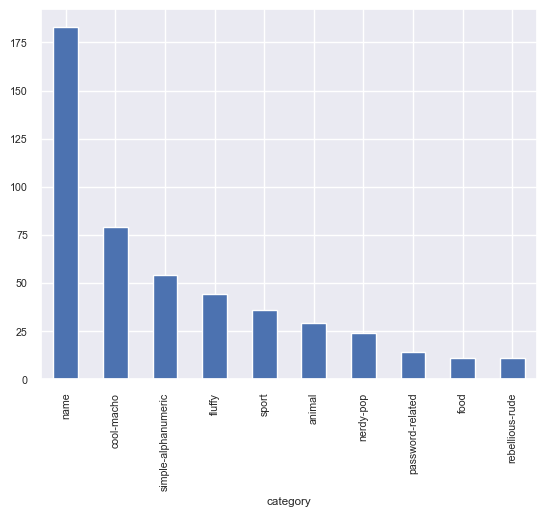

In [71]:
passwords['category'].value_counts().plot.bar()

In [72]:
import seaborn as sns

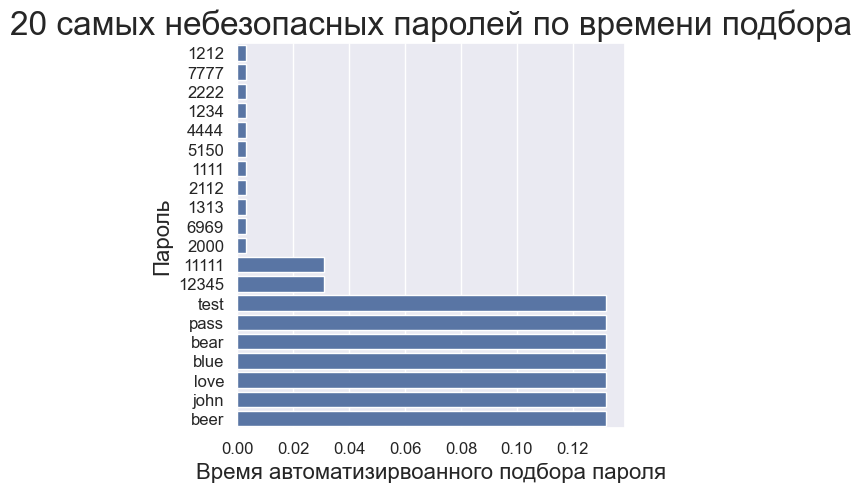

In [73]:
ps_20 = passwords.sort_values(by='time_online_crack', ascending=True).head(20)
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
sns.barplot(x = 'time_online_crack', y = 'password', data = ps_20)
plt.title('20 самых небезопасных паролей по времени подбора', fontsize=24)
plt.xlabel('Время автоматизирвоанного подбора пароля', fontsize=16)
plt.ylabel('Пароль', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'name'),
  Text(1, 0, 'cool-macho'),
  Text(2, 0, 'simple-alphanumeric'),
  Text(3, 0, 'fluffy'),
  Text(4, 0, 'sport'),
  Text(5, 0, 'animal'),
  Text(6, 0, 'nerdy-pop'),
  Text(7, 0, 'password-related'),
  Text(8, 0, 'food'),
  Text(9, 0, 'rebellious-rude')])

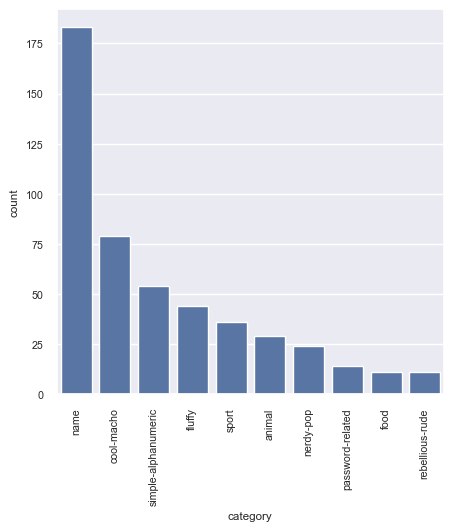

In [74]:
plt.figure(figsize=(5,5))
sns.countplot(x='category', data=passwords, order=passwords['category'].value_counts().index)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0.00321'),
  Text(1, 0, '0.0835'),
  Text(2, 0, '2.17'),
  Text(3, 0, '0.000124'),
  Text(4, 0, '4.75e-06'),
  Text(5, 0, '1.1100000000000002e-05'),
  Text(6, 0, '1.1100000000000001e-07'),
  Text(7, 0, '0.00111'),
  Text(8, 0, '1.11e-06'),
  Text(9, 0, '0.000111'),
  Text(10, 0, '0.0110999999999999')])

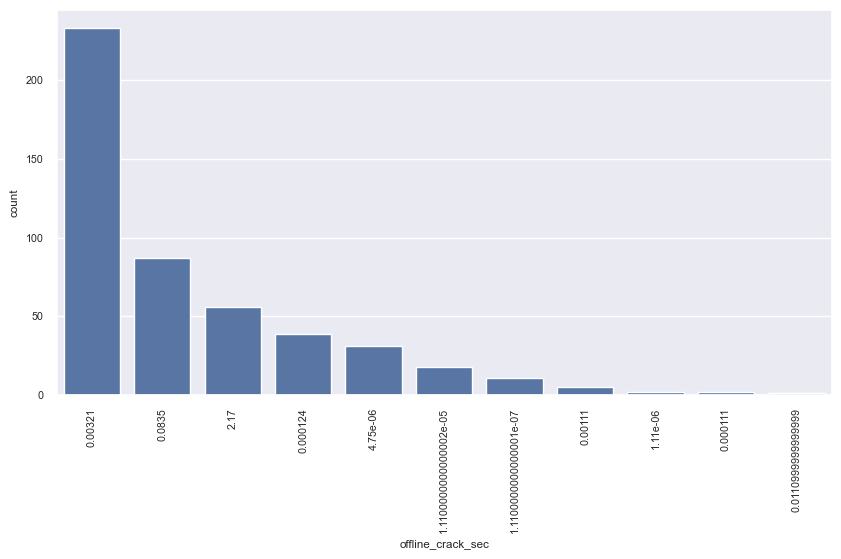

In [75]:
plt.figure(figsize=(10, 5))
sns.countplot(x='offline_crack_sec', data=passwords, order=passwords.groupby(by=['offline_crack_sec'])['rank'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

<Axes: ylabel='category'>

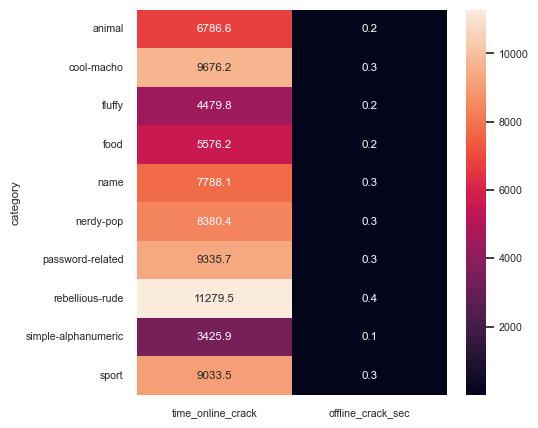

In [76]:
data = passwords.groupby(['category'], observed=False)[['time_online_crack', 'offline_crack_sec']].mean()

plt.figure(figsize=(5, 5))
sns.set(font_scale=0.7)
sns.heatmap(data, annot=True, fmt='.1f')

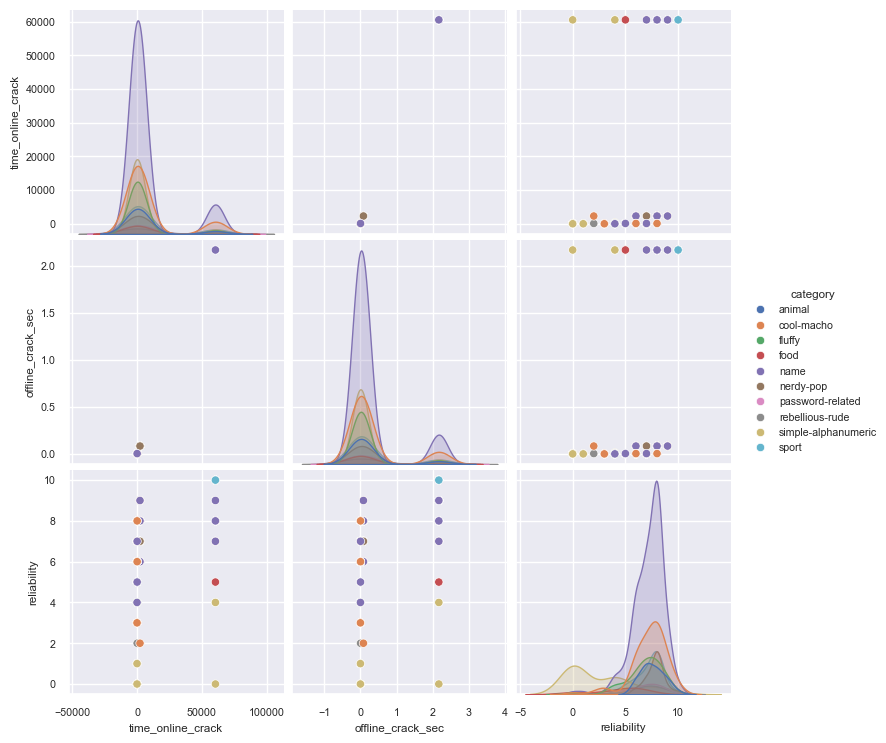

In [77]:
ps_pair = passwords.loc[:, ['category', 'time_online_crack', 'offline_crack_sec', 'reliability']]
sns.pairplot(ps_pair, hue='category')

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import numpy as np

In [79]:
passwords['security'] = np.nan # добавляем пустой столбец
#заполняем столбец данными по условию
conditions = [(passwords['reliability'] >= 8), (passwords['reliability'] >= 5), (passwords['reliability'] <= 4)]
values = ['High', 'Medium', 'Low']
passwords['security'] = np.select(conditions, values)
passwords.security = passwords.security.astype('category')
passwords.sample(10)

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability,security
221,222.0,cameron,name,2296.800,hours,0.083500,9,High
88,89.0,yellow,fluffy,89.280,hours,0.003210,6,Medium
33,34.0,test,password-related,0.132,hours,0.000005,4,Low
459,460.0,stella,name,89.280,hours,0.003210,6,Medium
430,431.0,explorer,cool-macho,60531.600,hours,2.170000,8,High
117,118.0,samantha,name,60531.600,hours,2.170000,8,High
22,23.0,harley,cool-macho,89.280,hours,0.003210,8,High
229,230.0,maddog,cool-macho,89.280,hours,0.003210,6,Medium
455,456.0,donkey,animal,89.280,hours,0.003210,8,High
67,68.0,thunder,cool-macho,2296.800,hours,0.083500,9,High


In [80]:
X = passwords.loc[:, ['time_online_crack', 'offline_crack_sec']]
y = passwords['security']
X.sample(3)


,time_online_crack,offline_crack_sec
428,3.43,0.000124
322,89.28,0.003210
344,3.43,0.000124


In [81]:
y.sample(3)

442    Medium
453       Low
417      High
Name: security, dtype: category
Categories (3, object): ['High', 'Low', 'Medium']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)
print(X_train)
print(X_test)

     time_online_crack  offline_crack_sec
330              89.28           0.003210
333               3.43           0.000124
479              89.28           0.003210
77               89.28           0.003210
353               3.43           0.000124
..                 ...                ...
149              89.28           0.003210
68               89.28           0.003210
220              89.28           0.003210
401              89.28           0.003210
21            60531.60           2.170000

[388 rows x 2 columns]
     time_online_crack  offline_crack_sec
317          89.280000           0.003210
310           0.308667           0.000011
0         60531.600000           2.170000
278          89.280000           0.003210
385           3.430000           0.000124
..                 ...                ...
453          30.960000           0.001110
18            0.308667           0.000011
467       60531.600000           2.170000
243           3.430000           0.000124
402       

In [83]:
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [84]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [86]:
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
print(classification_report(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

0.6082474226804123
0.711340206185567
              precision    recall  f1-score   support

        High       0.56      0.83      0.67        29
         Low       0.00      0.00      0.00         0
      Medium       0.88      0.51      0.65        68

    accuracy                           0.61        97
   macro avg       0.48      0.45      0.44        97
weighted avg       0.78      0.61      0.65        97

              precision    recall  f1-score   support

        High       0.56      0.83      0.67        29
         Low       0.71      1.00      0.83        10
      Medium       0.88      0.60      0.71        58

    accuracy                           0.71        97
   macro avg       0.72      0.81      0.74        97
weighted avg       0.76      0.71      0.71        97



c:\Users\shany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

,time_online_crack,offline_crack_sec,reliability
412,0.132,0.000005,3
168,0.132,0.000005,6
22,89.280,0.003210,8


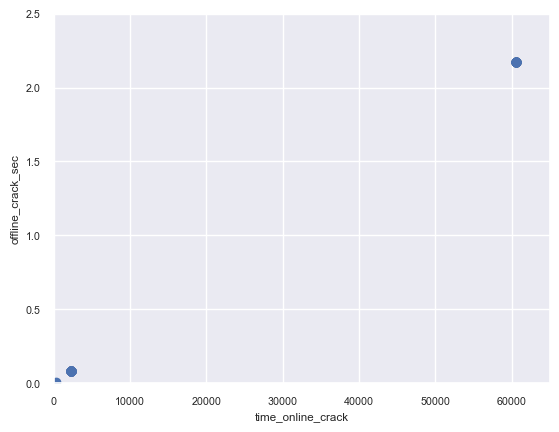

In [87]:
X = passwords.loc[:, ['time_online_crack', 'offline_crack_sec', 'reliability']]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X.time_online_crack, X.offline_crack_sec)
ax.set_xlabel('time_online_crack')
ax.set_ylabel('offline_crack_sec')
ax.set_xlim(0, 65000)
ax.set_ylim(0, 2.5)

X.sample(3)

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[2.81938531e+00 1.01467509e-04 4.18518519e+00]
 [6.05316000e+04 2.17000000e+00 8.26785714e+00]
 [2.29680000e+03 8.35000000e-02 7.95402299e+00]
 [9.02194872e+01 3.24371795e-03 6.82478632e+00]]


(0.0, 2.5)

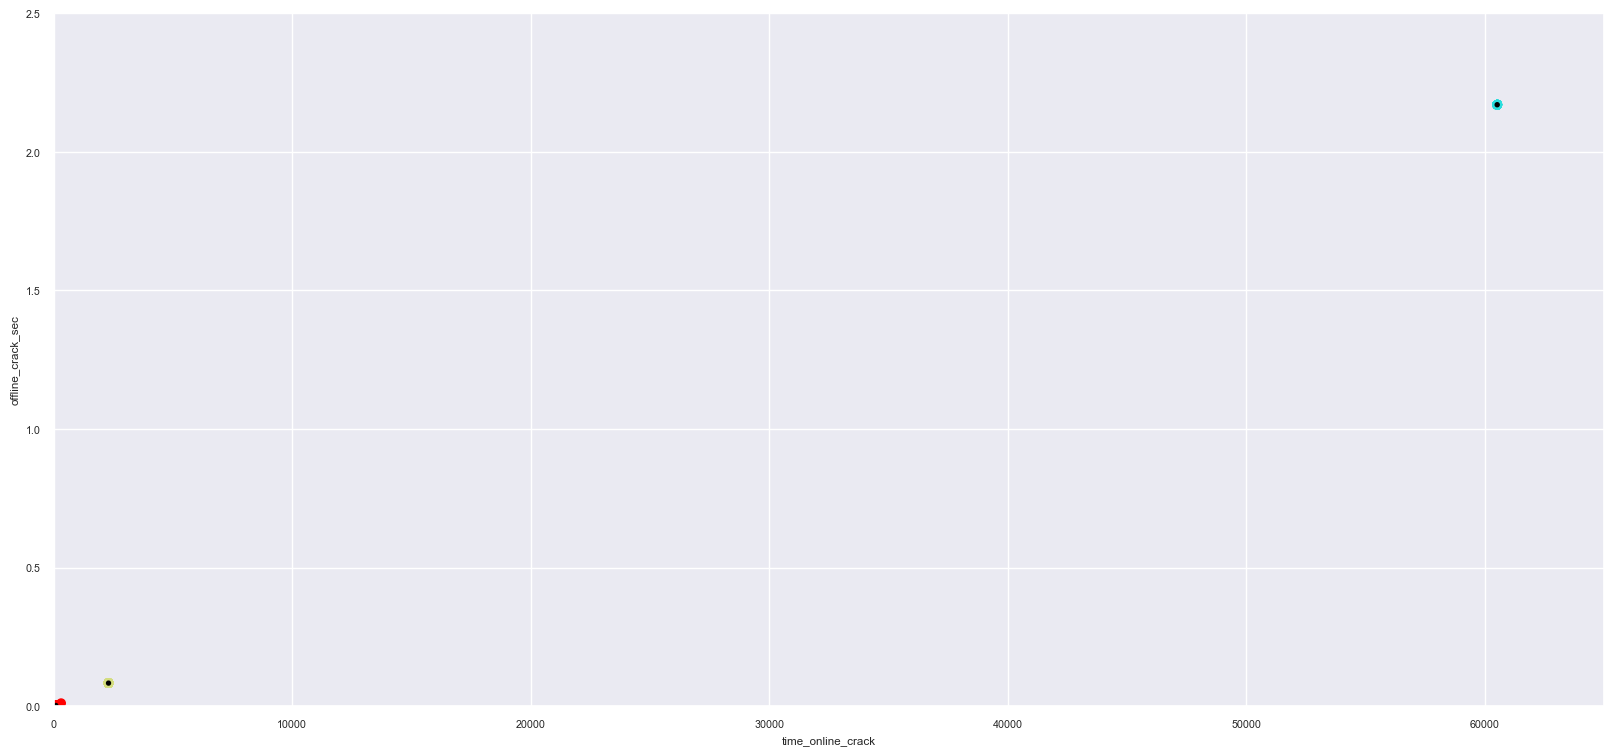

In [89]:
fig = plt.figure(figsize=(20, 9))
ax = fig.add_subplot()
ax.scatter(X.time_online_crack, X.offline_crack_sec, c=kmeans.labels_, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], color='black')
ax.set_xlabel('time_online_crack')
ax.set_ylabel('offline_crack_sec')
ax.set_xlim(0, 65000)
ax.set_ylim(0, 2.5)

In [90]:
from sklearn.cluster import DBSCAN

DBSCAN(eps=0.1, min_samples=20)

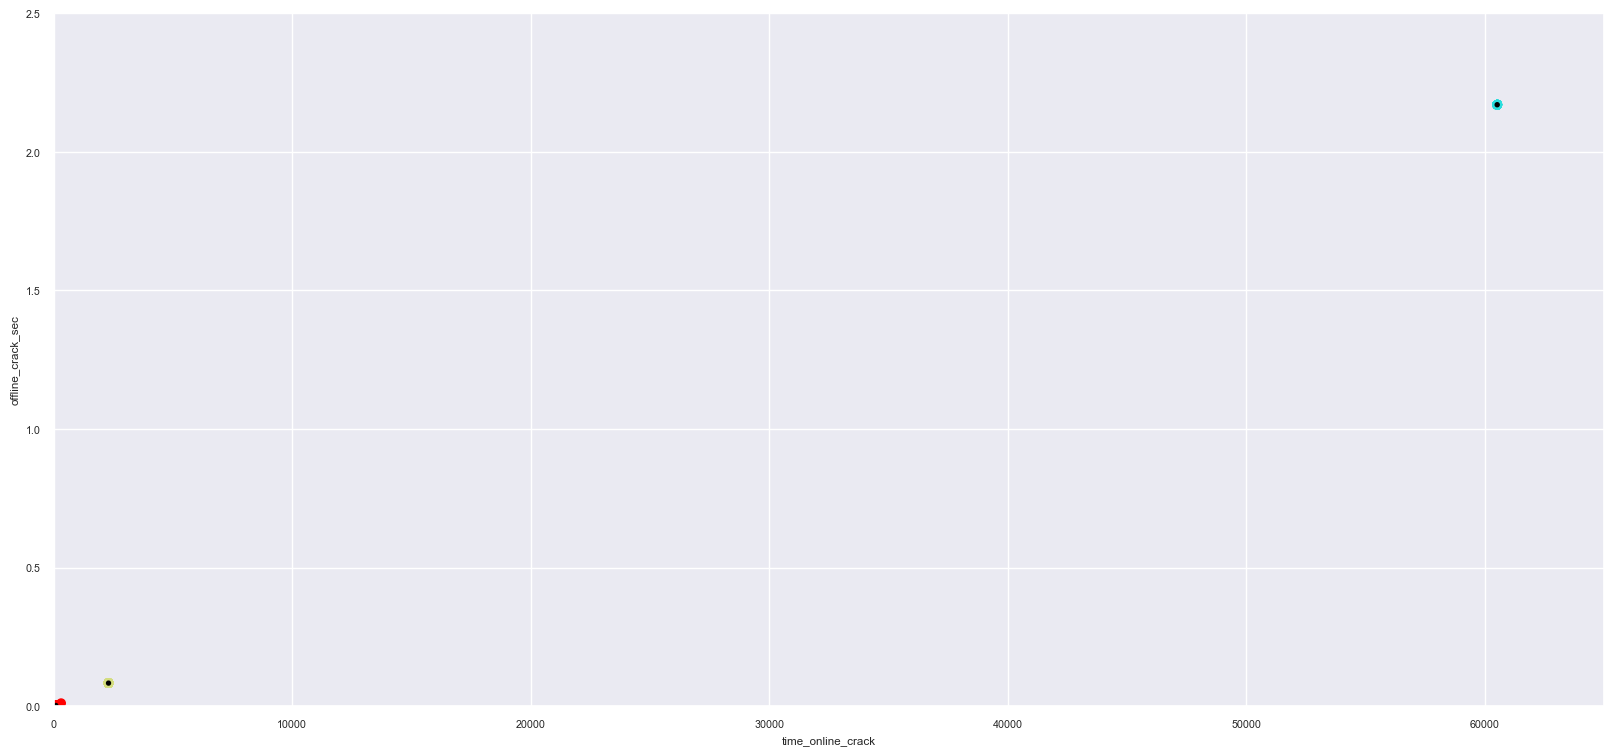

In [91]:
dbscan = DBSCAN(eps=0.1, min_samples=20)

fig = plt.figure(figsize=(20, 9))
ax = fig.add_subplot()
ax.scatter(X.time_online_crack, X.offline_crack_sec, c=kmeans.labels_, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], color='black')
ax.set_xlabel('time_online_crack')
ax.set_ylabel('offline_crack_sec')
ax.set_xlim(0, 65000)
ax.set_ylim(0, 2.5)

dbscan.fit(X)

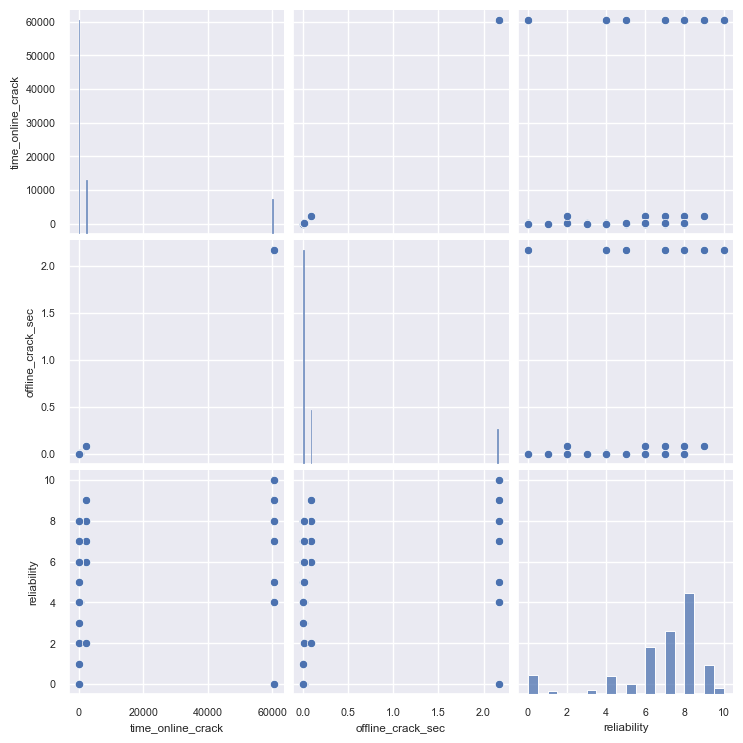

In [92]:
passwords_pair = passwords.loc[:, ['time_online_crack', 'offline_crack_sec', 'reliability']]
sns.pairplot(passwords_pair)

Text(0, 0.5, 'offline_crack_sec')

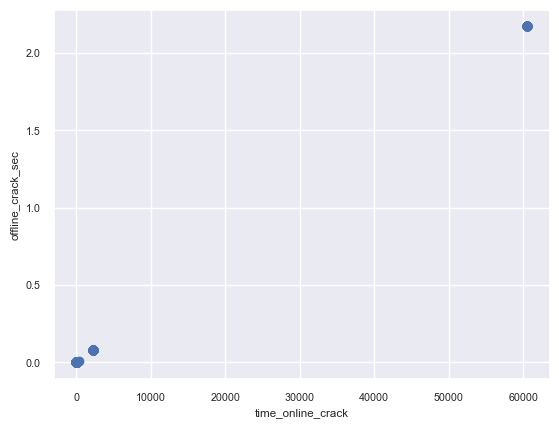

In [93]:
plt.scatter(passwords.time_online_crack, passwords.offline_crack_sec)
plt.xlabel('time_online_crack')
plt.ylabel('offline_crack_sec')

In [94]:
import statsmodels.api as sm

y = passwords['time_online_crack']
x = passwords['offline_crack_sec']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      time_online_crack   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.182e+09
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:55:53   Log-Likelihood:                -1904.2
No. Observations:                 485   AIC:                             3812.
Df Residuals:                     483   BIC:                             3821.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.5648      0.59

c:\Users\shany\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


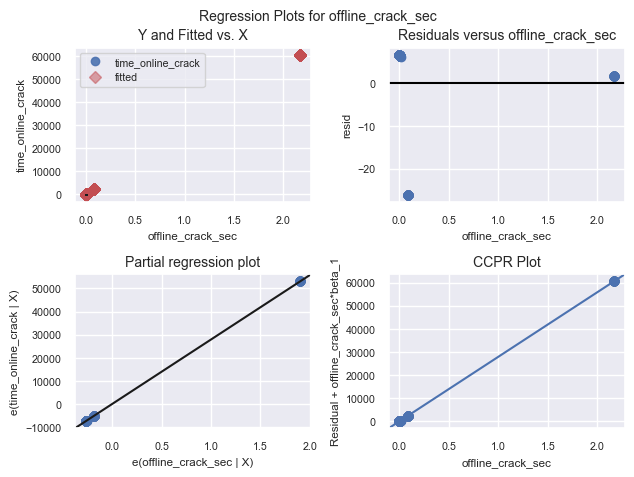

In [95]:
fig = plt.figure()
fig = sm.graphics.plot_regress_exog(model, 'offline_crack_sec', fig=fig)


In [96]:
from sklearn import linear_model

y = passwords['time_online_crack']
x = passwords[['offline_crack_sec', 'reliability']]

regr = linear_model.LinearRegression()
regr.fit(x,y)
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_, '\n')

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

Intercept:  4.927010804191923
Coefficients:  [ 2.78987391e+04 -1.80693702e+00] 

                            OLS Regression Results                            
Dep. Variable:      time_online_crack   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.602e+08
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:55:54   Log-Likelihood:                -1876.9
No. Observations:                 485   AIC:                             3760.
Df Residuals:                     482   BIC:                             3772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [97]:
passwords['security_2'] = np.nan
conditions = [(passwords['reliability'] > 7), (passwords['reliability'] <= 7)]
values = [1, 0]
passwords['security_2'] = np.select(conditions, values)
passwords.security_2 = passwords.security_2.astype('int16')
passwords.head(10)

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability,security,security_2
0,1.0,password,password-related,60531.600000,hours,2.170000e+00,8,High,1
1,2.0,123456,simple-alphanumeric,0.308667,hours,1.110000e-05,4,Low,0
2,3.0,12345678,simple-alphanumeric,30.960000,hours,1.110000e-03,4,Low,0
3,4.0,1234,simple-alphanumeric,0.003086,hours,1.110000e-07,4,Low,0
4,5.0,qwerty,simple-alphanumeric,89.280000,hours,3.210000e-03,8,High,1
5,6.0,12345,simple-alphanumeric,0.030833,hours,1.110000e-06,4,Low,0
6,7.0,dragon,animal,89.280000,hours,3.210000e-03,8,High,1
7,8.0,baseball,sport,60531.600000,hours,2.170000e+00,4,Low,0
8,9.0,football,sport,60531.600000,hours,2.170000e+00,7,Medium,0
9,10.0,letmein,password-related,2296.800000,hours,8.350000e-02,8,High,1


In [98]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
columns = ['time_online_crack', 'offline_crack_sec']
passwords[columns] = min_max_scaler.fit_transform(passwords[columns])
passwords.head(10)

,rank,password,category,time_online_crack,time_unit,offline_crack_sec,reliability,security,security_2
0,1.0,password,password-related,1.000000e+00,hours,1.000000e+00,8,High,1
1,2.0,123456,simple-alphanumeric,5.048282e-06,hours,5.064056e-06,4,Low,0
2,3.0,12345678,simple-alphanumeric,5.114174e-04,hours,5.114696e-04,4,Low,0
3,4.0,1234,simple-alphanumeric,0.000000e+00,hours,0.000000e+00,4,Low,0
4,5.0,qwerty,simple-alphanumeric,1.474881e-03,hours,1.479212e-03,8,High,1
5,6.0,12345,simple-alphanumeric,4.583924e-07,hours,4.603687e-07,4,Low,0
6,7.0,dragon,animal,1.474881e-03,hours,1.479212e-03,8,High,1
7,8.0,baseball,sport,1.000000e+00,hours,1.000000e+00,4,Low,0
8,9.0,football,sport,1.000000e+00,hours,1.000000e+00,7,Medium,0
9,10.0,letmein,password-related,3.794377e-02,hours,3.847921e-02,8,High,1


In [99]:
X = passwords.loc[:,['time_online_crack', 'offline_crack_sec']]
Y = passwords['security_2']
X.sample(3)

,time_online_crack,offline_crack_sec
412,0.000002,0.000002
487,0.001475,0.001479
88,0.001475,0.001479


In [100]:
Y.sample(3)

245    0
375    0
152    1
Name: security_2, dtype: int16

In [101]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(339, 2) (73, 2) (73, 2) (339,) (73,) (73,)


In [102]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
                    Dense(32, activation='relu', input_shape=(2,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),
                    ])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, validation_data=(X_val, Y_val))

Epoch 1/200
11/11 [==============================] - 1s 37ms/step - loss: 0.7020 - accuracy: 0.5251 - val_loss: 0.7102 - val_accuracy: 0.5753
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 0.7006 - accuracy: 0.5664 - val_loss: 0.7080 - val_accuracy: 0.5753
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6992 - accuracy: 0.5664 - val_loss: 0.7058 - val_accuracy: 0.5753
Epoch 4/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6979 - accuracy: 0.5664 - val_loss: 0.7038 - val_accuracy: 0.5753
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6967 - accuracy: 0.5664 - val_loss: 0.7020 - val_accuracy: 0.5753
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.5664 - val_loss: 0.7002 - val_accuracy: 0.5753
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6946 - accuracy: 0.5664 - val_loss: 0.6985 - val_accuracy: 0.5753
Epoch 8/200


In [103]:
model.evaluate(X_test, Y_test)[1]

3/3 [==============================] - 0s 4ms/step - loss: 0.5989 - accuracy: 0.6438


0.6438356041908264

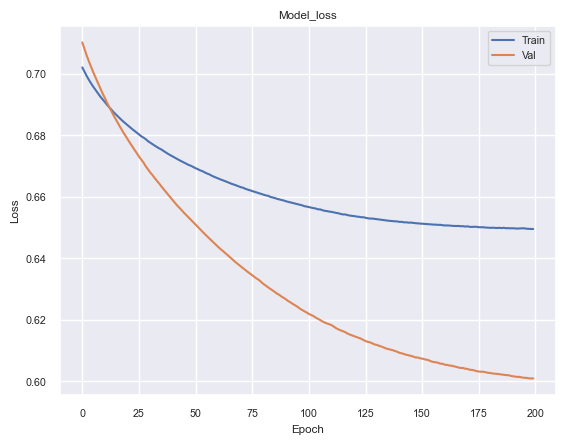

In [104]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

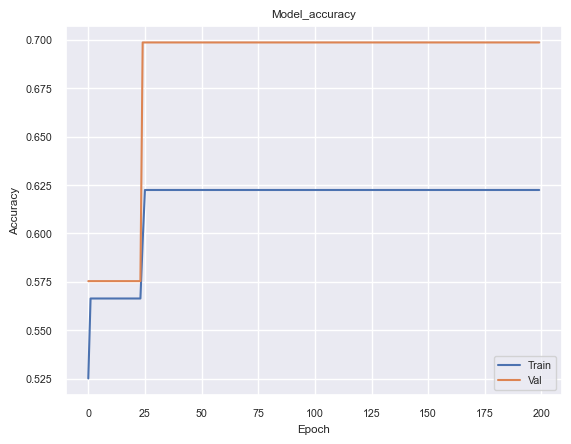

In [105]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [106]:
predications = model.predict(X_test[:3])

1/1 [==============================] - 0s 137ms/step


In [107]:
X_test[:3]

,time_online_crack,offline_crack_sec
233,0.001475,0.001479
221,0.037944,0.038479
119,1.000000,1.000000


In [108]:
predications

array([[0.4000918 ],
       [0.41570583],
       [0.8100301 ]], dtype=float32)